# Simulations: Monte Carlo Simulations and Value-at-Risk (VaR) 

## Monte Carlo Simulations / Value-at-Risk (VaR)

### Analyzing the Data / past Performance

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
np.set_printoptions(precision=4, suppress= True)

In [3]:
sp_returns = np.loadtxt("sp_returns2.csv", delimiter = ",", usecols = 1)

In [4]:
sp_returns

array([ 0.0012, -0.0061,  0.0022, ...,  0.0086, -0.0012,  0.0085])

In [5]:
sp_returns.size

3019

In [6]:
sp_returns.mean()

0.000267148957332019

In [7]:
sp_returns.std()

0.012484905249216954

In [8]:
x = np.linspace(-0.1, 0.1, 1000)

In [9]:
y = stats.norm.pdf(x, loc = sp_returns.mean(), scale = sp_returns.std())

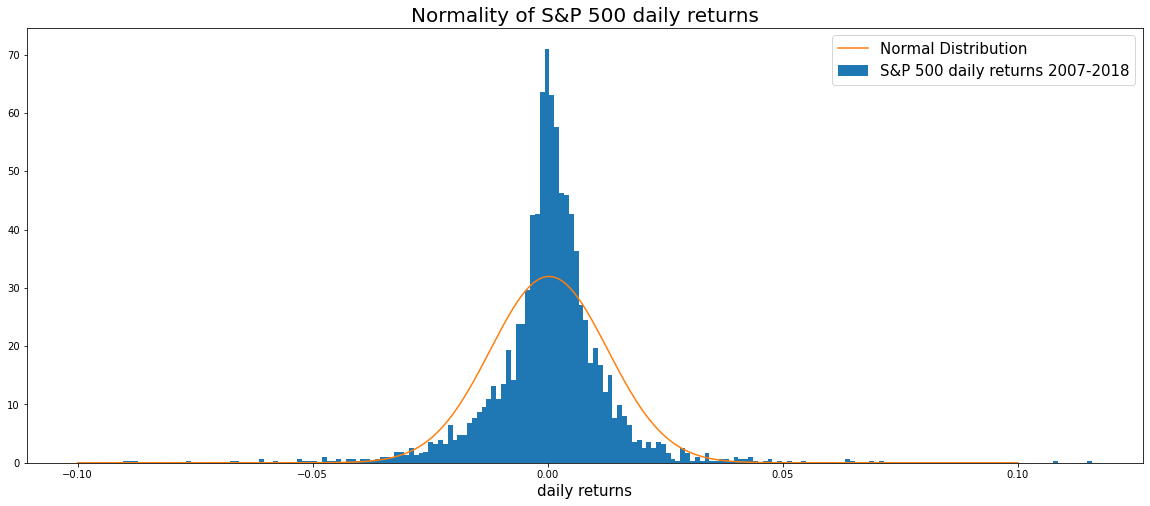

In [10]:
plt.figure(figsize = (20, 8))
plt.hist(sp_returns, density = True, bins = 200, label = "S&P 500 daily returns 2007-2018")
plt.plot(x, y, label = "Normal Distribution")
plt.title("Normality of S&P 500 daily returns", fontsize = 20)
plt.xlabel("daily returns",  fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [11]:
stats.skew(sp_returns)

-0.11775154454078195

In [12]:
stats.skewtest(sp_returns)

SkewtestResult(statistic=-2.6388253414879306, pvalue=0.008319383050798986)

In [13]:
stats.kurtosis(sp_returns)

10.901383580974628

In [14]:
stats.kurtosistest(sp_returns)

KurtosistestResult(statistic=23.721394870015782, pvalue=2.169130089232272e-124)

In [15]:
stats.normaltest(sp_returns)

NormaltestResult(statistic=569.66797376209, pvalue=1.9868781741023174e-124)

### Value-at-Risk (VaR) - Parametric Method

The Investment Fund ABC currently has a __1,000,000 USD__ position in the __S&P 500 Index__. The Risk Manager of the Fund wants to estimate the __tail risk__ (extreme negative outcomes) of this position based on __historical data__ (and forecasts).<br><br>Calculate the __minimum loss__ over a __one-day period__ that will occur with __1%__ probability: __1% Value-at-Risk (VaR) of 1,000,000 USD over a one-day period__. Use the __parametric method__.

In [16]:
import numpy as np
import scipy.stats as stats

In [17]:
sp_returns = np.loadtxt("sp_returns2.csv", delimiter = ",", usecols = 1)

In [18]:
sp_returns

array([ 0.0012, -0.0061,  0.0022, ...,  0.0086, -0.0012,  0.0085])

In [19]:
sp_returns.size

3019

__1% VaR of 1,000,000 USD over a one-day period__

In [20]:
I0 = 1000000
prob = 0.01

In [21]:
mean = sp_returns.mean()
mean

0.000267148957332019

In [22]:
std = sp_returns.std()
std

0.012484905249216954

In [23]:
stats.norm.ppf(loc = mean, scale = std, q = prob)

-0.028777083826785177

In [24]:
var_p = stats.norm.ppf(loc = mean, scale = std, q = prob) * I0
var_p

-28777.083826785176

__Using daily mean return = 0%__

In [25]:
stats.norm.ppf(loc = 0, scale = std, q = prob) * I0

-29044.232784117194

__Using a mean return forecast__

In [26]:
annual = -0.05

In [27]:
daily = (1 + annual)**(1/252) - 1
daily

-0.0002035241051570047

In [28]:
stats.norm.ppf(loc = daily, scale = std, q = prob) * I0

-29247.7568892742

### Value-at-Risk (VaR) - Historical Method

The Investment Fund ABC currently has a __1,000,000 USD__ position in the __S&P 500 Index__. The Risk Manager of the Fund wants to estimate the __tail risk__ (extreme negative outcomes) of this position based on __historical data__ (and forecasts).<br><br>Calculate the __minimum loss__ over a __one-day period__ that will occur with __1%__ probability: __1% Value-at-Risk (VaR) of 1,000,000 USD over a one-day period__. Use the __historical method__.

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
sp_returns = np.loadtxt("sp_returns2.csv", delimiter = ",", usecols = 1)

In [31]:
sp_returns.size

3019

__1% VaR of 1,000,000 USD over a one-day period__

In [32]:
I0 = 1000000
prob = 0.01

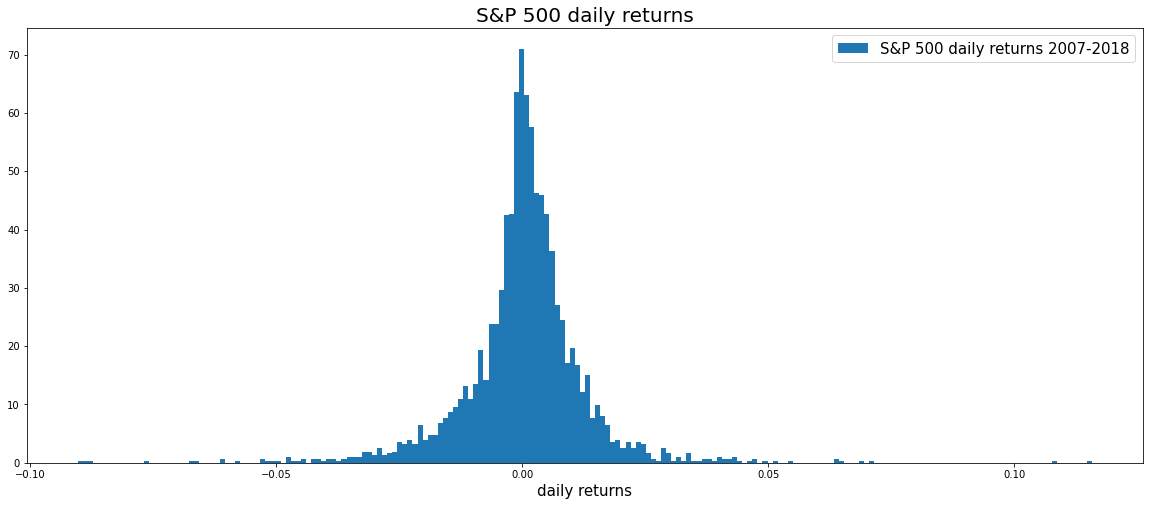

In [33]:
plt.figure(figsize = (20, 8))
plt.hist(sp_returns, density = True, bins = 200, label = "S&P 500 daily returns 2007-2018")
plt.title("S&P 500 daily returns", fontsize = 20)
plt.xlabel("daily returns",  fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [34]:
np.percentile(sp_returns, prob * 100)

-0.037385006376324616

In [35]:
var_h = np.percentile(sp_returns, prob * 100) * I0
var_h

-37385.006376324614

### Monte Carlo Simulation - Parametric Method (Part 1)

The Investment Fund ABC currently has a __1,000,000 USD__ position in the __S&P 500 Index__. The Risk Manager of the Fund wants to estimate the __tail risk__ (extreme negative outcomes) of this position based on __historical data__ (and forecasts).<br><br>Simulate the __minimum loss__ over a __period of one quarter__ that will occur with __1%__ probability: __1% Value-at-Risk (VaR) of 1,000,000 USD over a period of one quarter (63 business days)__. Use the __parametric method__.

In [36]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress= True)

In [37]:
sp_returns = np.loadtxt("sp_returns2.csv", delimiter = ",", usecols = 1)

In [38]:
sp_returns

array([ 0.0012, -0.0061,  0.0022, ...,  0.0086, -0.0012,  0.0085])

In [39]:
mean = sp_returns.mean()
mean

0.000267148957332019

In [40]:
std = sp_returns.std()
mean

0.000267148957332019

In [41]:
I0 = 100
size = int(252 / 4)

In [42]:
size

63

__one simulation / path__

In [43]:
np.random.seed(123)
ret = np.random.normal(loc = mean, scale = std, size = size)
ret

array([-0.0133,  0.0127,  0.0038, -0.0185, -0.007 ,  0.0209, -0.03  ,
       -0.0051,  0.0161, -0.0106, -0.0082, -0.0009,  0.0189, -0.0077,
       -0.0053, -0.0052,  0.0278,  0.0276,  0.0128,  0.0051,  0.0095,
        0.0189, -0.0114,  0.0149, -0.0154, -0.0077,  0.0116, -0.0176,
       -0.0015, -0.0105, -0.0029, -0.0347, -0.0219, -0.0085,  0.0118,
       -0.0019,  0.0003,  0.0089, -0.0107,  0.0038, -0.0098, -0.0213,
       -0.0046,  0.0074,  0.0045,  0.0001,  0.0301,  0.0054,  0.0125,
        0.0282, -0.0159, -0.0127,  0.022 , -0.0097,  0.0006,  0.0136,
        0.0114,  0.0222,  0.0189,  0.0136, -0.0094,  0.0102,  0.0042])

In [44]:
path = (ret + 1).cumprod() * I0
path

array([ 98.6713,  99.9263, 100.306 ,  98.4465,  97.7616,  99.8034,
        96.8063,  96.3138,  97.8618,  96.8289,  96.0341,  95.9462,
        97.7583,  97.0047,  96.4929,  95.9954,  98.6648, 101.3849,
       102.6829, 103.2054, 104.1831, 106.15  , 104.9381, 106.5066,
       104.8678, 104.0608, 105.2671, 103.4176, 103.2644, 102.1809,
       101.8821,  98.3496,  96.2006,  95.3857,  96.5157,  96.3323,
        96.3614,  97.2151,  96.1736,  96.5398,  95.5949,  93.5585,
        93.1269,  93.8189,  94.2406,  94.2518,  97.0922,  97.6186,
        98.8376, 101.6258, 100.011 ,  98.7407, 100.9166,  99.9381,
       100.0018, 101.3636, 102.5179, 104.7914, 106.7762, 108.2303,
       107.2151, 108.3077, 108.7616])

In [45]:
path = np.insert(path, 0, I0)

In [46]:
path

array([100.    ,  98.6713,  99.9263, 100.306 ,  98.4465,  97.7616,
        99.8034,  96.8063,  96.3138,  97.8618,  96.8289,  96.0341,
        95.9462,  97.7583,  97.0047,  96.4929,  95.9954,  98.6648,
       101.3849, 102.6829, 103.2054, 104.1831, 106.15  , 104.9381,
       106.5066, 104.8678, 104.0608, 105.2671, 103.4176, 103.2644,
       102.1809, 101.8821,  98.3496,  96.2006,  95.3857,  96.5157,
        96.3323,  96.3614,  97.2151,  96.1736,  96.5398,  95.5949,
        93.5585,  93.1269,  93.8189,  94.2406,  94.2518,  97.0922,
        97.6186,  98.8376, 101.6258, 100.011 ,  98.7407, 100.9166,
        99.9381, 100.0018, 101.3636, 102.5179, 104.7914, 106.7762,
       108.2303, 107.2151, 108.3077, 108.7616])

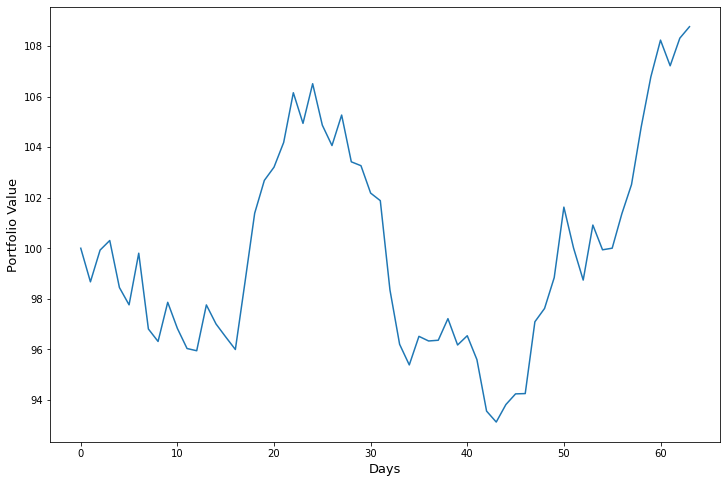

In [47]:
plt.figure(figsize = (12, 8))
plt.plot(path)
plt.xlabel("Days", fontsize = 13)
plt.ylabel("Portfolio Value", fontsize = 13)
plt.show()

### Monte Carlo Simulation - Parametric Method (Part 2)

__many simulations / path__

In [49]:
sims = 10000
days = 63

In [50]:
np.random.seed(123)
ret = np.random.normal(loc = mean, scale = std, size = days * sims).reshape(sims, days)

In [51]:
ret#.shape

array([[-0.0133,  0.0127,  0.0038, ..., -0.0094,  0.0102,  0.0042],
       [-0.0163,  0.018 ,  0.0103, ...,  0.0096,  0.0204, -0.0031],
       [ 0.0104,  0.0065,  0.0062, ..., -0.0066, -0.0119, -0.0042],
       ...,
       [-0.0138, -0.0252, -0.0106, ..., -0.0167, -0.0035,  0.007 ],
       [-0.02  , -0.0144,  0.0104, ...,  0.0157, -0.009 , -0.0033],
       [ 0.0056,  0.0106, -0.0144, ...,  0.0022,  0.0233,  0.0092]])

In [52]:
paths = (ret + 1).cumprod(axis = 1) * I0

In [53]:
paths

array([[ 98.6713,  99.9263, 100.306 , ..., 107.2151, 108.3077, 108.7616],
       [ 98.3709, 100.1378, 101.1738, ...,  96.2126,  98.1706,  97.8657],
       [101.0409, 101.6983, 102.3278, ..., 104.005 , 102.7628, 102.335 ],
       ...,
       [ 98.6194,  96.1296,  95.1101, ...,  92.9523,  92.6226,  93.2714],
       [ 98.0049,  96.5935,  97.5958, ..., 109.3675, 108.381 , 108.0192],
       [100.558 , 101.6203, 100.1609, ..., 116.2265, 118.9318, 120.0208]])

In [54]:
paths = np.hstack((np.ones(sims).reshape(sims, 1)*100, paths))
paths

array([[100.    ,  98.6713,  99.9263, ..., 107.2151, 108.3077, 108.7616],
       [100.    ,  98.3709, 100.1378, ...,  96.2126,  98.1706,  97.8657],
       [100.    , 101.0409, 101.6983, ..., 104.005 , 102.7628, 102.335 ],
       ...,
       [100.    ,  98.6194,  96.1296, ...,  92.9523,  92.6226,  93.2714],
       [100.    ,  98.0049,  96.5935, ..., 109.3675, 108.381 , 108.0192],
       [100.    , 100.558 , 101.6203, ..., 116.2265, 118.9318, 120.0208]])

In [55]:
def path_simul_param(daily_returns, days, I0, sims = 10000, seed = 123):
    
    mean = np.mean(daily_returns)
    std = np.std(daily_returns)
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.normal(loc = mean, scale = std, size = days * sims).reshape(sims, days)
    
    paths = (ret + 1).cumprod(axis = 1) * I0
    paths = np.hstack((np.ones(sims).reshape(sims, 1) * I0, paths))
    return paths

In [56]:
paths = path_simul_param(daily_returns = sp_returns, days =  63, I0 = 100)

In [57]:
paths

array([[100.    ,  98.6713,  99.9263, ..., 107.2151, 108.3077, 108.7616],
       [100.    ,  98.3709, 100.1378, ...,  96.2126,  98.1706,  97.8657],
       [100.    , 101.0409, 101.6983, ..., 104.005 , 102.7628, 102.335 ],
       ...,
       [100.    ,  98.6194,  96.1296, ...,  92.9523,  92.6226,  93.2714],
       [100.    ,  98.0049,  96.5935, ..., 109.3675, 108.381 , 108.0192],
       [100.    , 100.558 , 101.6203, ..., 116.2265, 118.9318, 120.0208]])

In [58]:
paths.shape

(10000, 64)

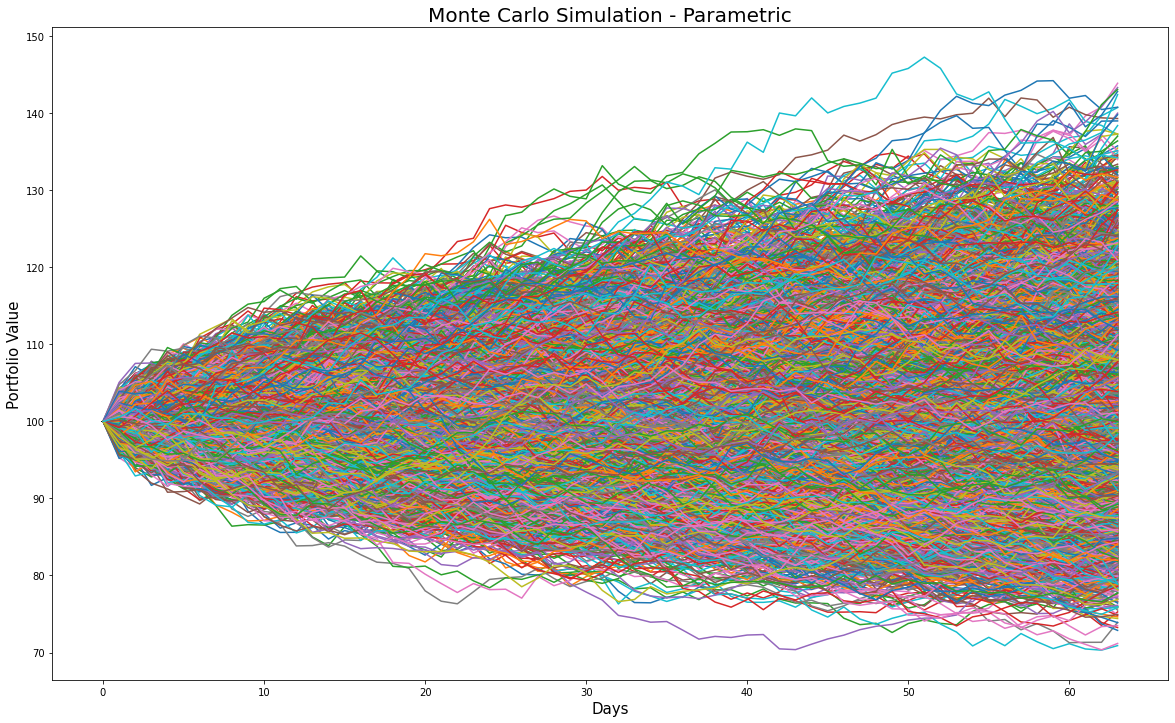

In [59]:
plt.figure(figsize = (20, 12))
plt.plot(paths.T)
plt.ylabel("Portfolio Value", fontsize = 15)
plt.xlabel("Days", fontsize = 15 )
plt.title("Monte Carlo Simulation - Parametric", fontsize = 20)
plt.show()

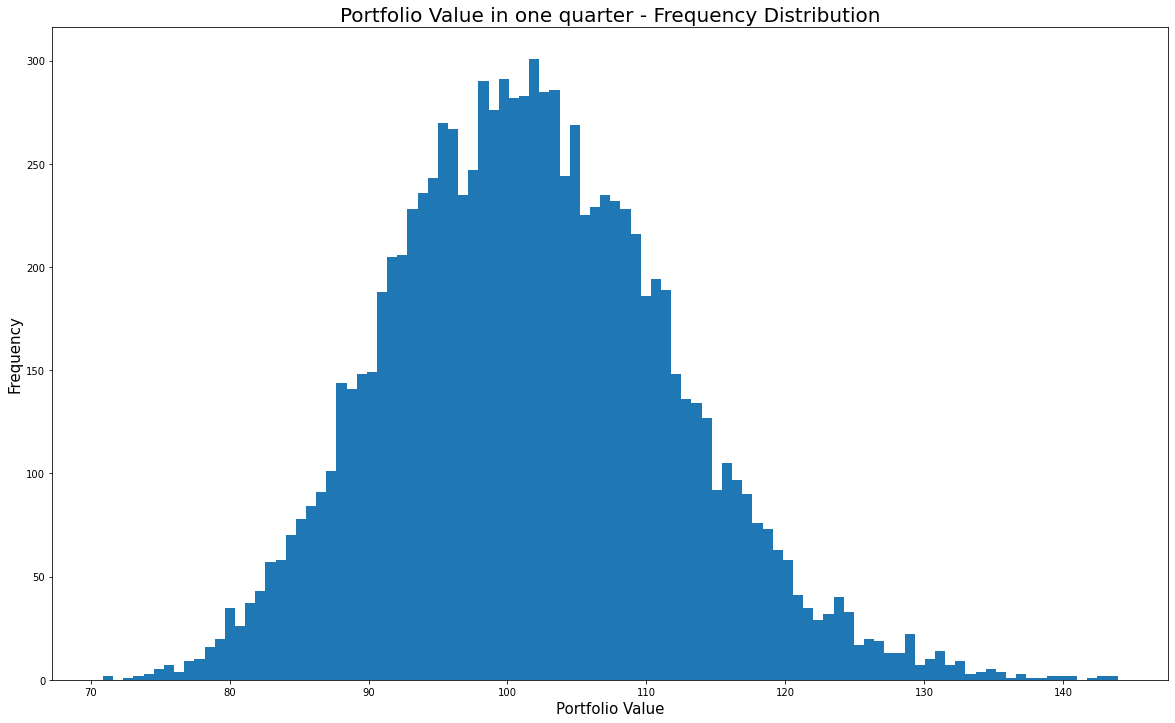

In [64]:
plt.figure(figsize = (20, 12))
plt.hist(paths[:, -1], bins = 100)
plt.title("Portfolio Value in one quarter - Frequency Distribution", fontsize = 20)
plt.xlabel("Portfolio Value", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

### Monte Carlo Simulation - Parametric Method (Part 3)

In [68]:
sims = 1000000
I0 = 1000000

In [69]:
paths = path_simul_param(sp_returns, days = 63, I0 = I0, sims = sims) 

In [70]:
paths.shape

(1000000, 64)

In [71]:
final_p = paths[:, -1]

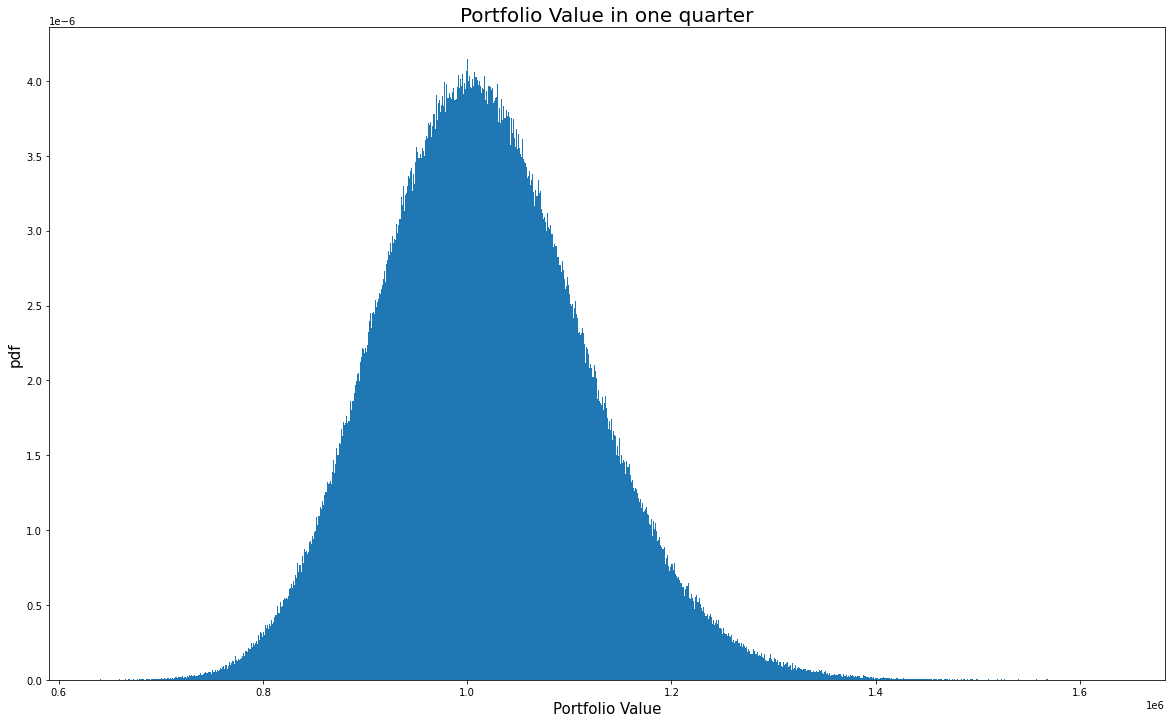

In [72]:
plt.figure(figsize = (20, 12))
plt.hist(final_p, bins = 1000, density = True)
plt.title("Portfolio Value in one quarter", fontsize = 20)
plt.xlabel("Portfolio Value", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.show()

In [73]:
final_p.mean()

1017144.0122875567

In [74]:
np.median(final_p)

1012167.4678941949

In [75]:
final_p.std()

101091.49984895984

In [76]:
stats.skew(final_p)

0.2975143226649517

__1% Value-at-Risk (VaR) of 1,000,000 USD over a period of one quarter__

In [77]:
prob = 0.01

In [78]:
np.percentile(final_p, prob * 100)

803317.7491221194

In [79]:
np.percentile(final_p, prob * 100) - I0

-196682.2508778806

In [80]:
def var_param(daily_returns, days, prob, I0, sims = 10000, seed = 123):
    
    mean = np.mean(daily_returns)
    std = np.std(daily_returns)
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.normal(loc = mean, scale = std, size = days * sims).reshape(sims, days)
    
    final = (ret + 1).prod(axis = 1) * I0
    var = np.percentile(final, prob) - I0
    
    return var 

In [81]:
var_param(sp_returns, days = 1, prob = 1, I0 = 1000000, sims = 1000000)

-28789.441526116687

In [82]:
var_param(sp_returns, days = 63, prob = 1, I0 = 1000000, sims = 1000000)

-196682.2508778806

In [83]:
var_p1= []
for i in range(1, 252+1):
    var_p1.append(-var_param(sp_returns, days = i, prob = 1, I0 = 1000000))

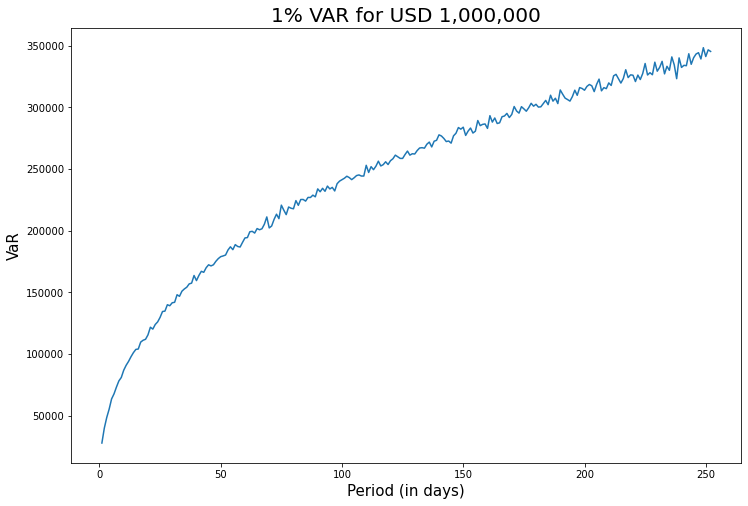

In [84]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 252+1), var_p1)
plt.title("1% VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Period (in days)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
plt.show()

In [85]:
var_p2= []
for i in np.linspace(0.1, 5, 100):
    var_p2.append(-var_param(sp_returns, days = 63, prob = i, I0 = 1000000))

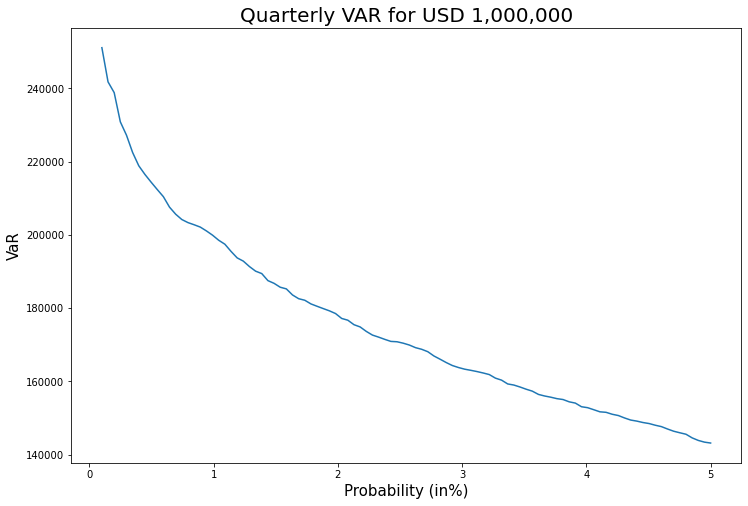

In [86]:
plt.figure(figsize = (12, 8))
plt.plot(np.linspace(0.1, 5, 100),var_p2)
plt.title("1% VAR for USD 1,000,000")
plt.title("Quarterly VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Probability (in%)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
plt.show()

### Monte Carlo Simulation - Bootstrapping Method (Part 1)

The Investment Fund ABC currently has a __1,000,000 USD__ position in the __S&P 500 Index__. The Risk Manager of the Fund wants to estimate the __tail risk__ (extreme negative outcomes) of this position based on __historical data__ (and forecasts).<br><br>Simulate the __minimum loss__ over a __period of one quarter__ that will occur with __1%__ probability: __1% Value-at-Risk (VaR) of 1,000,000 USD over a period of one quarter (63 business days)__. Use the __bootstrapping method__.

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [88]:
sp_returns = np.loadtxt("sp_returns2.csv", delimiter = ",", usecols = 1)

In [89]:
sp_returns

array([ 0.0012, -0.0061,  0.0022, ...,  0.0086, -0.0012,  0.0085])

In [90]:
sp_returns.size

3019

In [91]:
I0 = 100
sims = 10000
days = 63

In [92]:
def path_simul_bootstr(daily_returns, days, I0, sims = 10000, seed = 123):
    
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.choice(daily_returns, size = days * sims, replace = True).reshape(sims, days)
    
    paths = (ret + 1).cumprod(axis = 1) * I0
    paths = np.hstack((np.ones(sims).reshape(sims, 1) * I0, paths))
    
    return paths

In [93]:
paths = path_simul_bootstr(sp_returns, days = days, I0 = I0, sims = sims)
paths

array([[100.    ,  99.5721,  99.8753, ...,  94.7675,  94.8427,  95.2049],
       [100.    ,  99.3171,  96.7788, ..., 104.4218, 103.3152, 102.5655],
       [100.    , 100.0623,  99.4742, ..., 106.3798, 106.5001, 106.5898],
       ...,
       [100.    , 100.0758, 100.4963, ...,  96.0138,  97.423 ,  97.9853],
       [100.    , 100.0691, 100.3177, ..., 103.6501, 103.547 , 103.2399],
       [100.    , 100.0354,  98.4716, ...,  98.7646,  98.6142,  98.9582]])

In [94]:
paths.shape

(10000, 64)

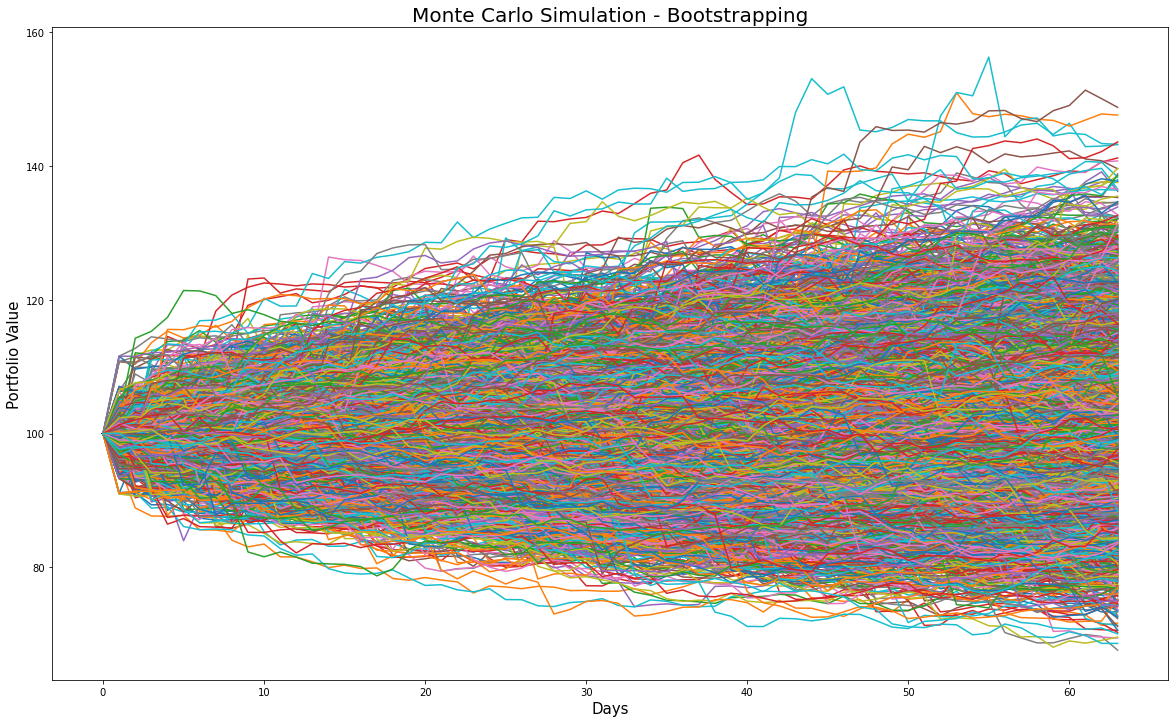

In [95]:
plt.figure(figsize = (20, 12))
plt.plot(paths.T)
plt.ylabel("Portfolio Value", fontsize = 15)
plt.xlabel("Days", fontsize = 15 )
plt.title("Monte Carlo Simulation - Bootstrapping", fontsize = 20)
plt.show()

In [96]:
sims = 1000000
I0 = 1000000
days = 63

In [97]:
paths = path_simul_bootstr(sp_returns, days = days, I0 = I0, sims = sims)

In [98]:
final_b = paths[:, -1]

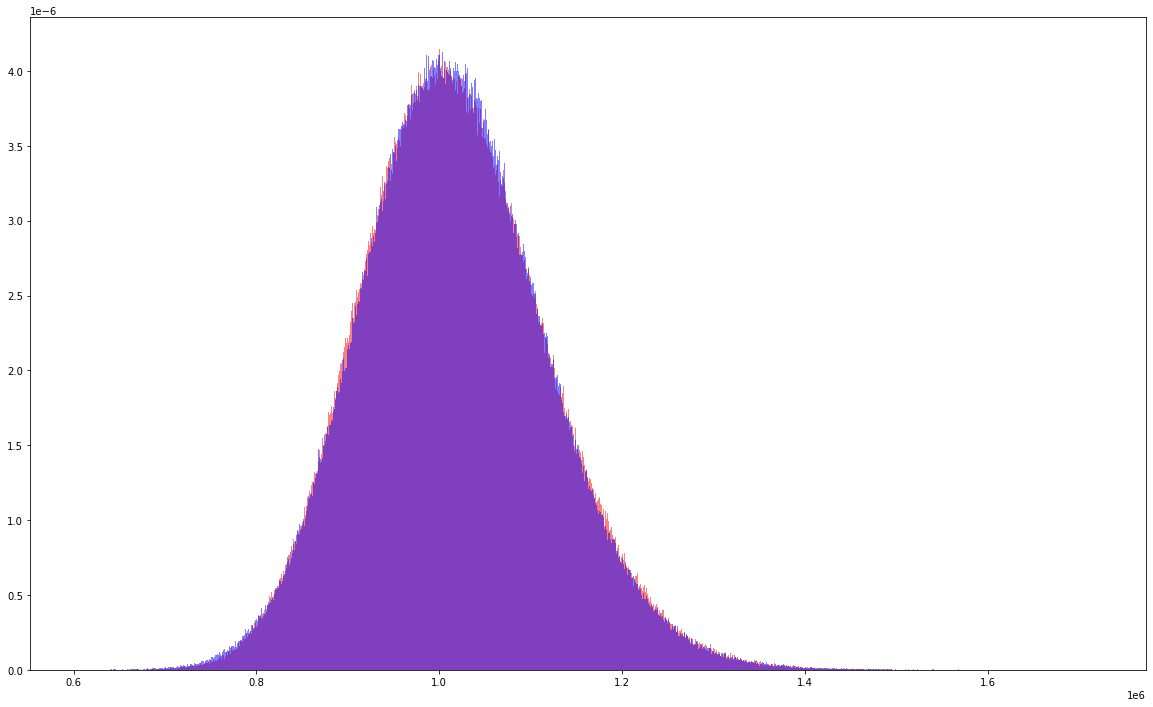

In [99]:
plt.figure(figsize = (20, 12))
plt.hist(final_p, bins = 1000, density = True, alpha = 0.5, color = "r")
plt.hist(final_b, bins = 1000, density = True, alpha = 0.5, color = "b")
plt.show()

In [100]:
final_b.mean()

1016790.2624944408

In [101]:
np.median(final_b)

1012638.8526600354

In [102]:
final_b.std()

100950.89865640606

In [103]:
stats.skew(final_b)

0.27939196982488845

### Monte Carlo Simulation - Bootstrapping Method (Part 2)

__1% Value-at-Risk (VaR) of 1,000,000 USD over a period of one quarter__

In [104]:
I0 = 1000000
prob = 0.01

In [105]:
final_b

array([ 952049.1088, 1025654.7357, 1065898.4042, ...,  996621.6452,
       1107850.1409,  857173.2327])

In [106]:
final_b.size

1000000

In [107]:
np.percentile(final_b, prob * 100) - I0

-202129.23942402937

In [108]:
np.percentile(final_p, prob * 100) - I0

-196682.2508778806

In [109]:
def var_bootstr(daily_returns, days, prob, I0, sims = 10000, seed = 123):
    
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.choice(daily_returns, size = days * sims, replace = True).reshape(sims, days)
    
    paths = (ret + 1).prod(axis = 1) * I0
    var = np.percentile(paths, prob) - I0
    
    return var 

In [110]:
var_bootstr(sp_returns, days = 63, prob = 1, I0 = 1000000, sims = 1000000)

-202129.23942402937

In [111]:
var_b1= []
for i in range(1, 252+1):
    var_b1.append(-var_bootstr(sp_returns, days = i, prob = 1, I0 = 1000000))

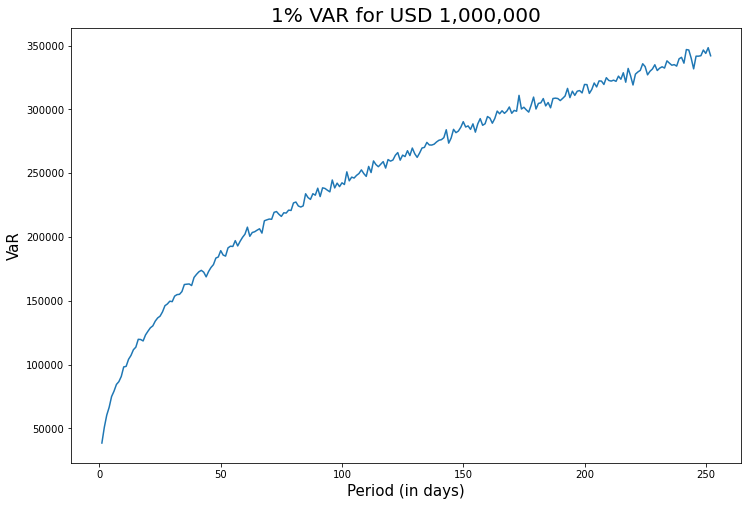

In [112]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 252+1), var_b1)
plt.title("1% VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Period (in days)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
plt.show()

In [113]:
var_b2= []
for i in np.linspace(0.1, 5, 100):
    var_b2.append(-var_bootstr(sp_returns, days = 63, prob = i, I0 = 1000000))

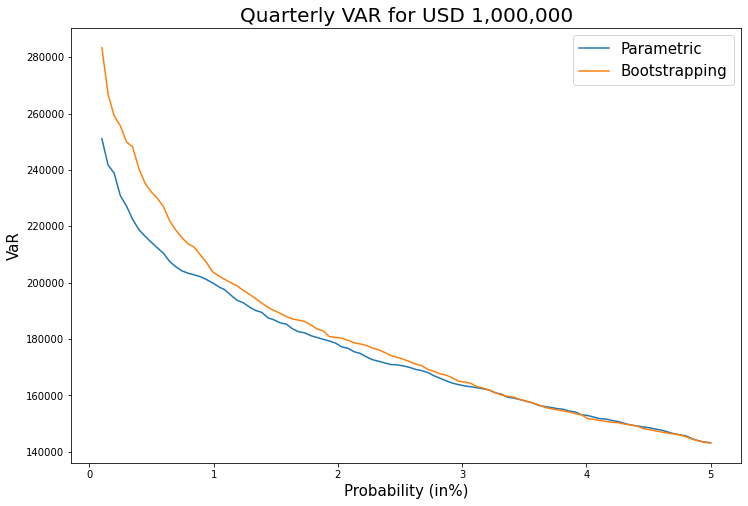

In [114]:
plt.figure(figsize = (12, 8))
plt.plot(np.linspace(0.1, 5, 100),var_p2, label = "Parametric")
plt.plot(np.linspace(0.1, 5, 100),var_b2, label = "Bootstrapping")
plt.title("1% VAR for USD 1,000,000")
plt.title("Quarterly VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Probability (in%)", fontsize = 15) 
plt.ylabel("VaR", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### Conditional Value-at-Risk (CVAR)

The Investment Fund ABC currently has a __1,000,000 USD__ position in the S&P 500 Index. The Risk Manager of the Fund wants to estimate the __tail risk__ (extreme negative outcomes) of this position based on historical data (and forecasts).<br><br>
__Simulate__ the __conditional expected loss__ over a period of __one quarter__ that will occur with __1% probability__.<br>
Use and compare __Parametric__ simulation & __Bootstrapping__ simulation


In [115]:
prob = 0.01

In [116]:
final_p

array([1087615.9914,  978656.6377, 1023350.3635, ...,  964906.3691,
       1010937.2914, 1066956.2097])

In [117]:
np.percentile(final_p, prob * 100)

803317.7491221194

In [118]:
np.percentile(final_p, prob * 100) - I0

-196682.2508778806

In [119]:
tail_p = final_p[final_p < np.percentile(final_p, prob * 100)]
tail_p

array([759278.1892, 780969.0915, 784951.2957, ..., 774217.3699,
       790940.2674, 746380.9795])

In [120]:
tail_p.mean() - I0

-222786.4341445146

In [121]:
final_b

array([ 952049.1088, 1025654.7357, 1065898.4042, ...,  996621.6452,
       1107850.1409,  857173.2327])

In [122]:
np.percentile(final_b, prob * 100)

797870.7605759706

In [123]:
np.percentile(final_b, prob * 100) - I0

-202129.23942402937

In [124]:
tail_b = final_b[final_b < np.percentile(final_b, prob * 100)]
tail_b

array([716637.5328, 772104.9263, 796118.3052, ..., 791439.2797,
       783002.9538, 754233.1369])

In [125]:
tail_b.mean() - I0

-231466.77378942445

### Dynamic & path-dependent Simulations (Part 1)

John (65) recently retired. He owns liquid assets worth __625,000 USD__ to cover life expenses during retirement. John´s bank offers to pay a fixed (guaranteed) monthly annuity of 2,635 USD for the next 30 years. 
Alternatively, John evaluates a diversified Investment Portfolio with an expected long-term __return of 0.5% per month__ with a monthly __standard deviation of 2.5%__ (assume normality). John plans to withdraw __2,800 USD per month__. 

Simulate/Calculate the __risk of outliving his assets__ prior to his 95th birthday (longevity risk). 

Formulate and simulate an appropriate __path-dependent strategy__ that 1) __lowers longevity risk to 10%__ or less, and, at the same time 2) __further increases expected income__.

In [127]:
import numpy as np
import numpy_financial as npf # NEW!!!
import matplotlib.pyplot as plt

__Alt 1: The Annuity Offer (Bank)__

In [128]:
n = 30
m = 12
r = 0.03
pv = 625000

In [129]:
npf.pmt(rate = r/m, nper = n*m, fv = 0, pv = - pv, when = "end")

2635.0252108090995

__Alt 2: The Investment Portfolio__

In [130]:
mean_ret = 0.06/12
std = 0.025

In [131]:
annuity = 2800

In [132]:
np.random.seed(120)
ret = np.random.normal(loc = mean_ret, scale = std, size = 1)  
ret

array([0.0087])

In [133]:
pv * (1 + ret) - annuity

array([627628.9027])

In [134]:
np.random.seed(123)
rets = np.random.normal(loc = mean_ret, scale = std, size = n*m)    

value_list = [pv]
for i in range(n*m):
    value = max(0, value_list[i] * (1 + rets[i]) - annuity)
    value_list.append(value)

In [135]:
value_list

[625000,
 608362.0218234287,
 623772.5092410453,
 628504.2269820294,
 605178.9332474844,
 596650.9108321457,
 621467.4432373189,
 584072.2268297913,
 577929.6891076542,
 596309.8912637874,
 583570.2938443905,
 573783.7005388882,
 572494.0574748119,
 593901.8202205794,
 584585.2028523429,
 578219.4967680427,
 572031.8348516654,
 603638.549845322,
 636857.4521838002,
 653227.7196261782,
 660000.5497463999,
 672667.1441315628,
 698299.641253262,
 682653.8280950772,
 703334.2022006996,
 682003.4442340498,
 671739.7434242533,
 687531.907428517,
 663612.9777923428,
 661807.2571688055,
 648058.4023551323,
 644357.2873449809,
 599696.7916720086,
 573335.7076524859,
 563370.7709515468,
 576450.2554365153,
 574030.1983712651,
 574141.1904047913,
 584090.3215222122,
 571367.5564953575,
 575475.7805518116,
 563966.436314218,
 539627.5783025894,
 534252.2084675261,
 541787.3957404016,
 546282.4147232885,
 546052.2570196234,
 578641.4296317378,
 584707.8388487315,
 599138.2434138518,
 632857.8663393

In [136]:
len(value_list)

361

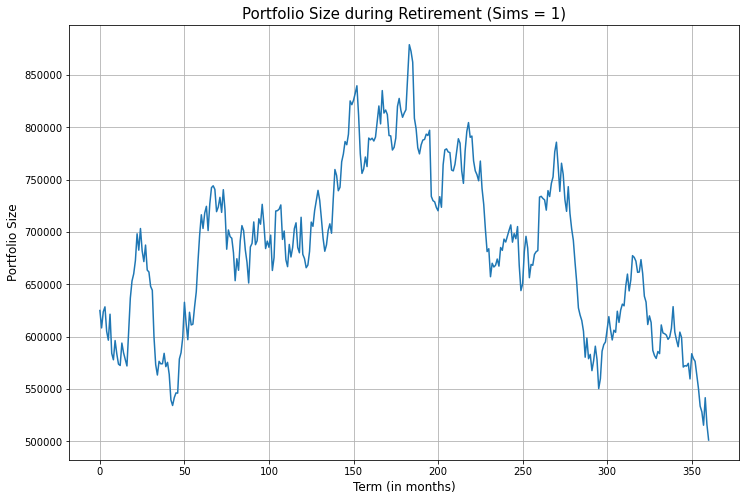

In [137]:
plt.figure(figsize = (12, 8))
plt.plot(value_list)
plt.grid()
plt.title("Portfolio Size during Retirement (Sims = 1)", fontsize = 15)
plt.ylabel("Portfolio Size", fontsize = 12)
plt.xlabel("Term (in months)", fontsize = 12)
plt.show()

### Dynamic & path-dependent Simulations (Part 2)

In [138]:
sims = 20

In [139]:
sims_array = np.empty(sims * (n * m + 1)).reshape(sims, (n * m + 1))
sims_array.shape

(20, 361)

In [140]:
sims_array = np.empty(sims * (n * m + 1)).reshape(sims, n * m + 1)
np.random.seed(123)

for sim in range(sims):
    rets = np.random.normal(loc = mean_ret, scale = std, size = n*m)    
    value_list = [pv]
    
    for i in range(n*m):
        value = max(0, value_list[i] * (1 + rets[i]) - annuity)
        value_list.append(value)
    
    sims_array[sim, :] = value_list

In [145]:
sims_array

array([[ 625000.    ,  608362.0218,  623772.5092, ...,  541703.5285,
         516036.9714,  501260.6493],
       [ 625000.    ,  619052.8996,  629771.3323, ...,  904732.261 ,
         913270.6028,  918573.867 ],
       [ 625000.    ,  638982.497 ,  645916.6769, ...,       0.    ,
              0.    ,       0.    ],
       ...,
       [ 625000.    ,  618808.5004,  626109.4991, ..., 1224866.4639,
        1242513.697 , 1176405.2205],
       [ 625000.    ,  633276.4403,  627507.3977, ..., 1991379.9457,
        1970268.4147, 1986025.018 ],
       [ 625000.    ,  633137.3439,  625291.696 , ...,  341427.9823,
         345886.0445,  343429.6664]])

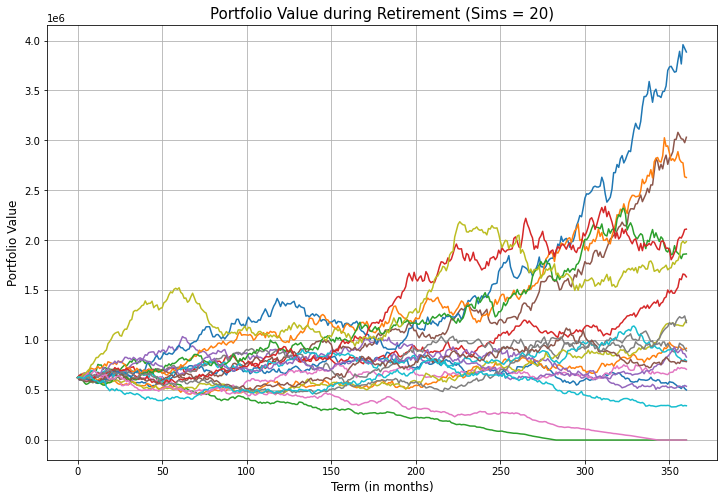

In [146]:
plt.figure(figsize = (12, 8))
plt.plot(sims_array.T)
plt.grid()
plt.title("Portfolio Value during Retirement (Sims = {})".format(sims), fontsize = 15)
plt.ylabel("Portfolio Value", fontsize = 12)
plt.xlabel("Term (in months)", fontsize = 12)
plt.show()

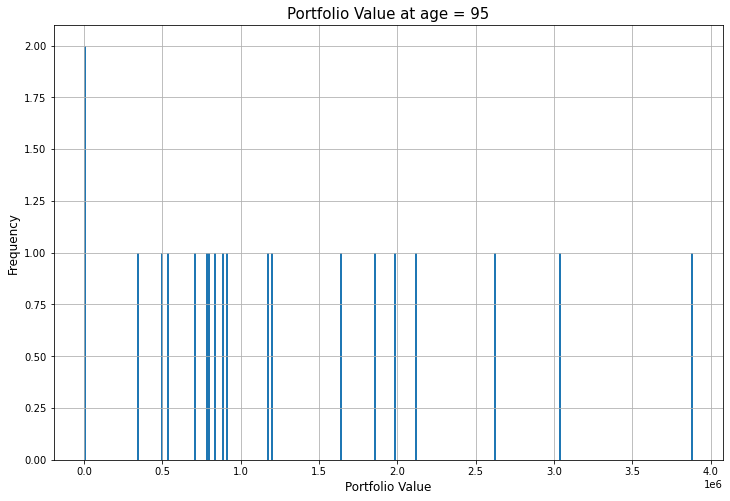

In [147]:
plt.figure(figsize = (12, 8))
plt.hist(sims_array[:, -1], bins= 300)
plt.grid()
plt.title("Portfolio Value at age = 95", fontsize = 15)
plt.xlabel("Portfolio Value", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.show()

In [150]:
(sims_array[:, -1] == 0).sum() / sims

0.1

In [176]:
def outliving_risk(assets, nper, annuity, mean_ret, std, sims = 10000, seed = 123):
    
    sims_array = np.empty(sims * (nper + 1)).reshape(sims, nper + 1)
    withdrawels = []
    np.random.seed(seed)
    
    for sim in range(sims):
        rets = np.random.normal(loc = mean_ret, scale = std, size = nper)    
        value_list = [assets]
    
        for i in range(nper):
            withdrawel = min(value_list[i] * (1 + rets[i]), annuity)
            withdrawels.append(withdrawel)
            value = value_list[i] * (1 + rets[i]) - withdrawel
            value_list.append(value)
    
        sims_array[sim, :] = value_list
    
    return (sims_array[:, -1] <= 0).sum() / sims, np.mean(withdrawels)

In [177]:
outliving_risk(assets = pv, nper = n*m, annuity = 2800, mean_ret = mean_ret, std = std, sims = 10000)

(0.1414, 2729.9681830107493)

### Dynamic & path-dependent Simulations (Part 3)

In [159]:
annuities = np.arange(2400, 3400, 10)
annuities

array([2400, 2410, 2420, 2430, 2440, 2450, 2460, 2470, 2480, 2490, 2500,
       2510, 2520, 2530, 2540, 2550, 2560, 2570, 2580, 2590, 2600, 2610,
       2620, 2630, 2640, 2650, 2660, 2670, 2680, 2690, 2700, 2710, 2720,
       2730, 2740, 2750, 2760, 2770, 2780, 2790, 2800, 2810, 2820, 2830,
       2840, 2850, 2860, 2870, 2880, 2890, 2900, 2910, 2920, 2930, 2940,
       2950, 2960, 2970, 2980, 2990, 3000, 3010, 3020, 3030, 3040, 3050,
       3060, 3070, 3080, 3090, 3100, 3110, 3120, 3130, 3140, 3150, 3160,
       3170, 3180, 3190, 3200, 3210, 3220, 3230, 3240, 3250, 3260, 3270,
       3280, 3290, 3300, 3310, 3320, 3330, 3340, 3350, 3360, 3370, 3380,
       3390])

In [ ]:
risks = []
for i in annuities:
    risk = outliving_risk(assets = pv, nper = n*m, annuity = i,
                          mean_ret = mean_ret, std = std, sims = 1000)[0]
    risks.append(risk)

In [155]:
risks

[0.036,
 0.039,
 0.042,
 0.043,
 0.043,
 0.045,
 0.046,
 0.05,
 0.051,
 0.053,
 0.055,
 0.055,
 0.056,
 0.056,
 0.057,
 0.064,
 0.066,
 0.07,
 0.07,
 0.071,
 0.071,
 0.074,
 0.078,
 0.08,
 0.083,
 0.087,
 0.089,
 0.092,
 0.093,
 0.095,
 0.097,
 0.101,
 0.105,
 0.108,
 0.108,
 0.112,
 0.114,
 0.117,
 0.118,
 0.12,
 0.122,
 0.127,
 0.131,
 0.134,
 0.138,
 0.14,
 0.142,
 0.146,
 0.151,
 0.156,
 0.16,
 0.166,
 0.17,
 0.175,
 0.177,
 0.18,
 0.182,
 0.187,
 0.19,
 0.196,
 0.204,
 0.207,
 0.216,
 0.22,
 0.222,
 0.23,
 0.234,
 0.241,
 0.245,
 0.248,
 0.252,
 0.257,
 0.261,
 0.267,
 0.274,
 0.277,
 0.285,
 0.292,
 0.296,
 0.301,
 0.308,
 0.311,
 0.315,
 0.319,
 0.324,
 0.332,
 0.335,
 0.34,
 0.34,
 0.344,
 0.349,
 0.355,
 0.359,
 0.364,
 0.365,
 0.37,
 0.374,
 0.378,
 0.384,
 0.388]

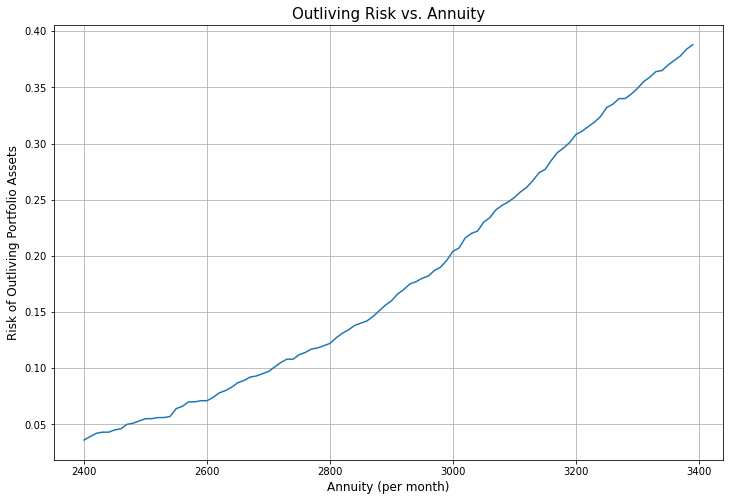

In [156]:
plt.figure(figsize = (12, 8))
plt.plot(annuities, risks)
plt.grid()
plt.title("Outliving Risk vs. Annuity", fontsize = 15)
plt.ylabel("Risk of Outliving Portfolio Assets", fontsize = 12)
plt.xlabel("Annuity (per month)", fontsize = 12)
plt.show()

### Dynamic & path-dependent Simulations (Part 4)

Formulate and simulate an appropriate __path-dependent strategy__ that 1) lowers __longevity risk__ to __10% or less__, and, at the same time 2) further increases expected income. Assume an acceptable __minimum income of 2200 USD__ per month (reduced annuity).

Simple path-dependent Strategy: __Reduce__ withdrawels to 2200 USD, if current __portfolio value is below the target__ level.

How to calculate the target levels for the next 360 months (__idealized path__)? -> __Bank Annuity Plan__ (equivalent: Amortizing Loan Balances)

In [161]:
import numpy as np
import numpy_financial as npf # NEW!
import matplotlib.pyplot as plt

In [162]:
n = 30
m = 12
r = 0.03
pv = 625000

In [163]:
annuity = npf.pmt(rate = r/m, nper = n*m, fv = 0, pv = - pv, when = "end")
annuity

2635.0252108090995

In [164]:
balances = npf.fv(r/m, nper = range(0, n*m + 1), pmt = annuity, pv = -pv)
balances

array([625000.    , 623927.4748, 622852.2683, 621774.3737, 620693.7844,
       619610.4937, 618524.4947, 617435.7807, 616344.345 , 615250.1806,
       614153.2809, 613053.6389, 611951.2478, 610846.1007, 609738.1907,
       608627.511 , 607514.0545, 606397.8145, 605278.7838, 604156.9555,
       603032.3227, 601904.8783, 600774.6153, 599641.5266, 598505.6052,
       597366.844 , 596225.2359, 595080.7738, 593933.4505, 592783.259 ,
       591630.1919, 590474.2422, 589315.4026, 588153.6658, 586989.0248,
       585821.4722, 584651.0006, 583477.6029, 582301.2717, 581121.9997,
       579939.7795, 578754.6037, 577566.465 , 576375.356 , 575181.2691,
       573984.1971, 572784.1324, 571581.0675, 570374.995 , 569165.9072,
       567953.7968, 566738.6561, 565520.4775, 564299.2535, 563074.9764,
       561847.6386, 560617.2325, 559383.7504, 558147.1846, 556907.5273,
       555664.7709, 554418.9076, 553169.9297, 551917.8293, 550662.5987,
       549404.23  , 548142.7153, 546878.0469, 545610.2168, 54433

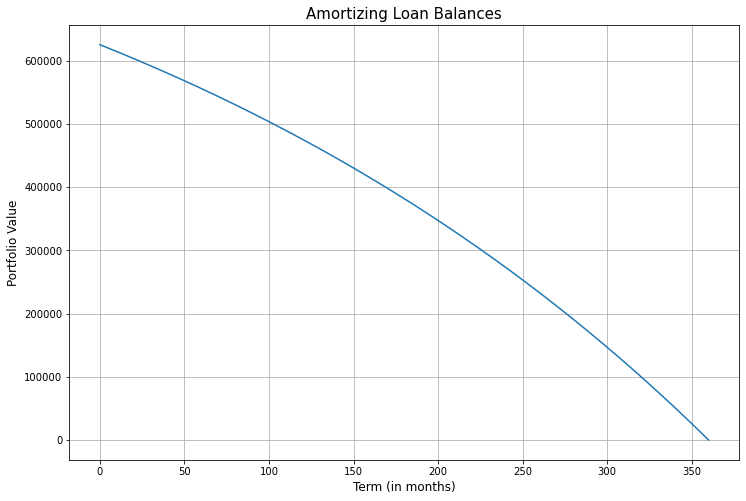

In [165]:
plt.figure(figsize = (12, 8))
plt.plot(balances)
plt.grid()
plt.title("Amortizing Loan Balances", fontsize = 15)
plt.ylabel("Portfolio Value", fontsize = 12)
plt.xlabel("Term (in months)", fontsize = 12)
plt.show()

In [166]:
mean_ret = 0.06/12
std = 0.025

In [167]:
def outliving_risk(assets, nper, annuity, red_annuity, mean_ret, std, balances, sims = 10000, seed = 123):
    
    sims_array = np.empty(sims * (nper + 1)).reshape(sims, nper + 1)
    withdrawels = []
    np.random.seed(seed)
    
    for sim in range(sims):
        rets = np.random.normal(loc = mean_ret, scale = std, size = nper)    
        value_list = [assets]
    
        for i in range(nper):
            
            if value_list[i] < balances[i]:
                withdrawel =  min(value_list[i] * (1 + rets[i]), red_annuity)
            else:
                withdrawel = min(value_list[i] * (1 + rets[i]), annuity)
            
            withdrawels.append(withdrawel)
            value = value_list[i] * (1 + rets[i]) - withdrawel
            value_list.append(value)
    
        sims_array[sim, :] = value_list
    
    return (sims_array[:, -1] == 0).sum() / sims, np.mean(withdrawels), sims_array

In [172]:
outliving_risk(assets = pv, nper = n*m, annuity = 2800, red_annuity = 2200,
                       mean_ret = mean_ret, std = std, balances = balances, sims = 20)[:2]

(0.05, 2742.670773000167)

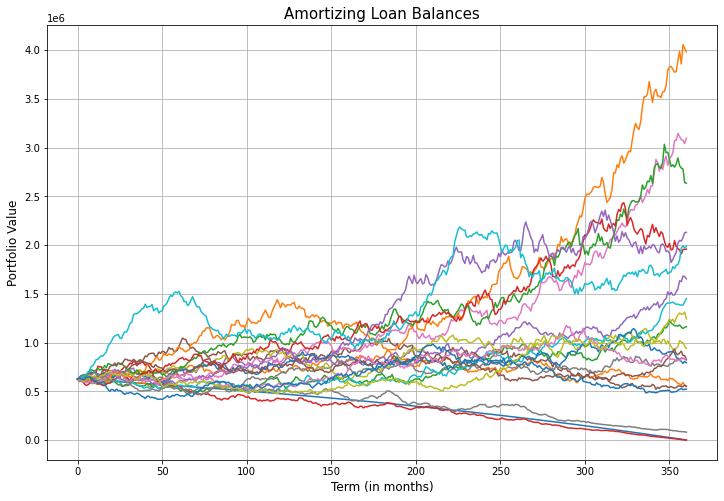

In [173]:
plt.figure(figsize = (12, 8))
plt.plot(balances)
plt.plot(array.T)
plt.grid()
plt.title("Amortizing Loan Balances", fontsize = 15)
plt.ylabel("Portfolio Value", fontsize = 12)
plt.xlabel("Term (in months)", fontsize = 12)
plt.show()

In [174]:
outliving_risk(assets = pv, nper = n*m, annuity = 3250, red_annuity = 2200,
               mean_ret = mean_ret, std = std, balances = balances, sims = 10000)[:2]

(0.0955, 3065.4189444550166)